In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
all_df = clinical_df.join(mouse_df.set_index('Mouse ID'),on='Mouse ID')
all_df
# Combine the data into a single dataset
#mouse_df
#res = len(numb)
#res
# Display the data table for preview
#clinical_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin
1889,u364,45,31.023923,3,Capomulin
1890,p438,45,61.433892,1,Ceftamin
1891,x773,45,58.634971,4,Placebo


In [28]:
w_df = all_df.copy()
w_df.set_index('Drug')
w_df=w_df.drop(['Mouse ID','Metastatic Sites'],axis=1)

w_df_grp = w_df.groupby(['Drug','Timepoint'])


# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_mean = w_df_grp['Tumor Volume (mm3)'].mean()


# Convert to DataFrame
time_list = []
# use comprehension to create list.
[time_list.append(drug) for drug in vol_mean]
df = pd.DataFrame(vol_mean)

drug_sort = []
# use comprehension to create list.
[drug_sort.append(drug) for drug in w_df_grp['Drug']]

response_summary = pd.DataFrame({'Tumor Volume mm3' : w_df_grp['Tumor Volume (mm3)'].mean()})

# remove the index setting so that it will display in desired framework.
new_summary = response_summary.reset_index()
new_summary.head(5)
#w_df.head(20)
#vol_sem

,Drug,Timepoint,Tumor Volume mm3
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


## Tumor Response to Treatment

In [29]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
vol_sem = w_df_grp['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
vol_sem_summary_pre = pd.DataFrame({'Tumor Volume SEM' : vol_sem})
vol_sem_summary = vol_sem_summary_pre.reset_index()

# Preview DataFrame
vol_sem_summary.head(20)

,Drug,Timepoint,Tumor Volume SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [39]:
# Minor Data Munging to Re-Format the Data Frames
summary_need_transpose = new_summary.copy()
error_need_tran = vol_sem_summary.copy()

summary_transpose = summary_need_transpose.pivot(index='Timepoint', columns='Drug')
error_transpose = error_need_tran.pivot(index='Timepoint', columns='Drug')
# Preview that Reformatting worked
summary_transpose.head(5)
error_transpose.head(10)

Tumor Volume SEM                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.448593  0.164505  0.235102  0.264819  0.202385  0.218091   
10                0.702684  0.236144  0.282346  0.357421  0.319415  0.402064   
15                0.838617  0.332053  0.357705  0.580268  0.444378  0.614461   
20                0.909731  0.359482  0.476210  0.726484  0.595260  0.839609   
25                0.881642  0.439356  0.550315  0.755413  0.813706  1.034872   
30                0.934460  0.490620  0.631061  0.934121  0.975496  1.218231   
35                1.052241  0.692248  0.984155  1.127867  1.013769  1.287481   
40                1.223608  0.708505  1.055220  1.158449  1.118567  1.370634   
45                1.223977  0.902358  1.144427  1.453186  1.416363  1.351726   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.231708  0.482955  0.239862  0.188950  
10         0.376195  0.720225  0.433678  0.263949  
15         0.466109  0.770432  0.493261  0.370544  
20         0.555181  0.786199  0.621889  0.533182  
25         0.577401  0.746991  0.741922  0.602513  
30         0.746045  0.864906  0.899548  0.800043  
35         1.084929  0.967433  1.003186  0.881426  
40         1.564779  1.128445  1.410435  0.998515  
45         1.888586  1.226805  1.576556  1.003576

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


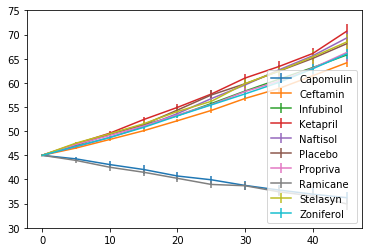

45

In [50]:
# Generate the Plot (with Error Bars)
ax = plt.gca()
x_limit = 45
x_axis = np.arange(0,x_limit,5)

treat_sum= summary_transpose.copy()
#treat_sum.plot(kind='line',x=x_axis,y='Capomulin',ax=ax)
#plt.plot(summary_transpose.loc['Timepoint':],summary_transpose.loc['Tumor Volume (mm3)',:],label='Capomulin')
#plt.show()
# Save the Figure
#vol_sem_summary.
#summary_transpose
drug_names = []
[drug_names.append(drug) for drug in summary_transpose['Tumor Volume mm3']]
# Use index of first drug to get x scale values.
x_limits = summary_transpose['Tumor Volume mm3'][drug_names[0]].keys()
#thedays
#drug_names
max_y_val = 0
min_y_val = 10
for drug in drug_names:
    temp_max = summary_transpose['Tumor Volume mm3'][drug].max()
    temp_min = summary_transpose['Tumor Volume mm3'][drug].min()
    plt.errorbar(x_limits, summary_transpose['Tumor Volume mm3'][drug],yerr=error_transpose['Tumor Volume SEM'][drug],label=drug)
    if temp_max > max_y_val:
        max_y_val = int(temp_max)
    if temp_min > min_y_val:
        min_y_val = int(temp_min)
    
plt.ylim(min_y_val - 15, max_y_val + 5)


#plt.errorbar(x_limits, summary_transpose['Tumor Volume mm3'][drug_names[0]],yerr=error_transpose['Tumor Volume SEM'][drug_names[0]],label=drug_names[0])
#plt.errorbar(x_limits, summary_transpose['Tumor Volume mm3'][drug_names[1]],yerr=error_transpose['Tumor Volume SEM'][drug_names[1]],label=drug_names[1])
plt.legend(loc='best')
plt.show()
min_y_val

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)